In [1]:
import pandas as pd

# Read data
df = pd.read_csv('data/mental_health.csv')

# Print a few data points
print(df.head())

print("\nShape of the DataFrame:", df.shape)

                                                text  label
0  dear american teens question dutch person hear...      0
1  nothing look forward lifei dont many reasons k...      1
2  music recommendations im looking expand playli...      0
3  im done trying feel betterthe reason im still ...      1
4  worried  year old girl subject domestic physic...      1

Shape of the DataFrame: (27977, 2)


In [2]:
# We disregard blank / white space only data points, are there any?
blank_rows = df[df['text'].str.strip() == '']

# Print out the exact row index of the blank rows
print("Indices of blank rows:", blank_rows.index.tolist())

Indices of blank rows: [6579, 13183]


In [3]:
# Remove the blank rows from the DataFraQme
df = df[df['text'].str.strip() != '']

# Print the shape of the DataFrame after removing blank rows
print("Shape of the DataFrame after removing blank rows:", df.shape)

Shape of the DataFrame after removing blank rows: (27975, 2)


In [4]:
import pandas as pd
import nltk
from collections import Counter
from nltk.corpus import words
from nltk import ngrams

# Ensure nltk resources are available
# nltk.download('words')

# Function to detect suspected spelling mistakes
english_words = set(words.words())
def count_spelling_mistakes(text):
    tokens = text.split()
    return sum(1 for word in tokens if word.lower() not in english_words)

# Function to find the longest consecutive repeating sequence and the repeated word
def longest_consecutive_repeat(text):
    tokens = text.split()
    max_repeat = 1
    repeat_word = None
    current_repeat = 1

    for i in range(1, len(tokens)):
        if tokens[i] == tokens[i-1]:
            current_repeat += 1
            if current_repeat > max_repeat:
                max_repeat = current_repeat
                repeat_word = tokens[i]
        else:
            current_repeat = 1

    return max_repeat, repeat_word

# Function to find the most common word and its frequency in a document
def most_common_word(text):
    tokens = text.split()
    counter = Counter(tokens)
    most_common = counter.most_common(1)[0] if counter else ("", 0)
    return most_common[0], most_common[1]

# Adding new columns to the DataFrame
df['document_length'] = df['text'].apply(lambda x: len(x.split()))
df['suspected_spelling_mistake'] = df['text'].apply(count_spelling_mistakes)
df['longest_repeat'], df['repeated_word'] = zip(*df['text'].apply(longest_consecutive_repeat))
df['most_common'], df['num_most_common'] = zip(*df['text'].apply(most_common_word))

# Export the updated DataFrame to a new CSV
df.to_csv('data/mental_health_cleaned.csv', index=False)

# Print the head of the new DataFrame
print(df.head())

                                                text  label  document_length  \
0  dear american teens question dutch person hear...      0               23   
1  nothing look forward lifei dont many reasons k...      1               20   
2  music recommendations im looking expand playli...      0               64   
3  im done trying feel betterthe reason im still ...      1              100   
4  worried  year old girl subject domestic physic...      1              311   

   suspected_spelling_mistake  longest_repeat repeated_word most_common  \
0                           8               1          None        guys   
1                           5               1          None     nothing   
2                          22               1          None       music   
3                          25               1          None          im   
4                          77               1          None        girl   

   num_most_common  
0                2  
1                2  
2    

In [8]:
df_cleaned_1 = pd.read_csv('data/mhc_revision_1.csv')

print(df_cleaned_1.head())

print(df_cleaned_1.shape)

                                                text  document_length  \
0  dear american teens question dutch person hear...               23   
1  nothing look forward lifei dont many reasons k...               20   
2  music recommendations im looking expand playli...               64   
3  im done trying feel betterthe reason im still ...              100   
4  worried  year old girl subject domestic physic...              311   

   suspected_spelling_mistake  longest_repeat repeated_word most_common  \
0                           8               1           NaN        guys   
1                           5               1           NaN     nothing   
2                          22               1           NaN       music   
3                          25               1           NaN          im   
4                          77               1           NaN        girl   

   num_most_common  label  
0                2      0  
1                2      1  
2                2      0 

In [12]:
import pandas as pd
from collections import Counter
import re

def preprocess_text(text):
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text.split()

def generate_ngrams(words, n):
    return [tuple(words[i:i+n]) for i in range(len(words)-n+1)]

def get_most_common_ngrams(doc, n=2):
    words = preprocess_text(doc)
    ngram_counts = Counter(generate_ngrams(words, n))
    if not ngram_counts:
        return None, 0
    most_common = ngram_counts.most_common(1)[0]
    return ' '.join(most_common[0]), most_common[1]

# Read data
df_cleaned_1 = pd.read_csv('data/mhc_revision_1.csv')

# Initialize new columns
for n in range(2, 6):
    df_cleaned_1[f'most_common_{n}-gram'] = None
    df_cleaned_1[f'num_most_common_{n}-gram'] = 0

# Loop through the DataFrame and compute n-grams for each document
for idx, row in df_cleaned_1.iterrows():
    doc = row['text']
    
    for n in range(2, 6):
        ngram, count = get_most_common_ngrams(doc, n)
        df_cleaned_1.at[idx, f'most_common_{n}-gram'] = ngram
        df_cleaned_1.at[idx, f'num_most_common_{n}-gram'] = count

# Export the updated DataFrame to a new CSV
df_cleaned_1.to_csv('data/mhc_revision_2.csv', index=False)
print("Processing complete and saved to 'mhc_revision_2.csv'.")

Processing complete and saved to 'mhc_revision_2.csv'.


In [13]:
df_cleaned_2 = pd.read_csv('data/mhc_revision_2.csv')

print(df_cleaned_2.head())

print(df_cleaned_2.shape)

                                                text  document_length  \
0  dear american teens question dutch person hear...               23   
1  nothing look forward lifei dont many reasons k...               20   
2  music recommendations im looking expand playli...               64   
3  im done trying feel betterthe reason im still ...              100   
4  worried  year old girl subject domestic physic...              311   

   suspected_spelling_mistake  longest_repeat repeated_word most_common  \
0                           8               1           NaN        guys   
1                           5               1           NaN     nothing   
2                          22               1           NaN       music   
3                          25               1           NaN          im   
4                          77               1           NaN        girl   

   num_most_common  label     most_common_2-gram  num_most_common_2-gram  \
0                2      0         

In [16]:
import pandas as pd
import numpy as np

# Load the cleaned DataFrame
df_cleaned_2 = pd.read_csv('data/mhc_revision_2.csv')

# Define a function to replace n-grams and their counts with NaN if count is 1
def replace_ngrams_with_na(df):
    ngram_columns = [
        'most_common_2-gram', 'most_common_3-gram', 
        'most_common_4-gram', 'most_common_5-gram'
    ]
    
    count_columns = [
        'num_most_common_2-gram',
        'num_most_common_3-gram',
        'num_most_common_4-gram',
        'num_most_common_5-gram'
    ]

    # Iterate through each n-gram and corresponding count
    for i in range(len(ngram_columns)):
        ngram_col = ngram_columns[i]
        count_col = count_columns[i]

        # Replace n-gram and count with NaN if count is 1
        df.loc[df[count_col] == 1, ngram_col] = np.nan
        df.loc[df[count_col] == 1, count_col] = np.nan

# Apply the function to the DataFrame
replace_ngrams_with_na(df_cleaned_2)

# Print the updated DataFrame
print(df_cleaned_2.head())

# Optionally, save the updated DataFrame to a new CSV file
df_cleaned_2.to_csv('data/mhc_revision_3.csv', index=False)

                                                text  document_length  \
0  dear american teens question dutch person hear...               23   
1  nothing look forward lifei dont many reasons k...               20   
2  music recommendations im looking expand playli...               64   
3  im done trying feel betterthe reason im still ...              100   
4  worried  year old girl subject domestic physic...              311   

   suspected_spelling_mistake  longest_repeat repeated_word most_common  \
0                           8               1           NaN        guys   
1                           5               1           NaN     nothing   
2                          22               1           NaN       music   
3                          25               1           NaN          im   
4                          77               1           NaN        girl   

   num_most_common  label     most_common_2-gram  num_most_common_2-gram  \
0                2      0         

In [17]:
df_cleaned_3 = pd.read_csv('data/mhc_revision_3.csv')

print(df_cleaned_3.head())

print(df_cleaned_3.shape)

                                                text  document_length  \
0  dear american teens question dutch person hear...               23   
1  nothing look forward lifei dont many reasons k...               20   
2  music recommendations im looking expand playli...               64   
3  im done trying feel betterthe reason im still ...              100   
4  worried  year old girl subject domestic physic...              311   

   suspected_spelling_mistake  longest_repeat repeated_word most_common  \
0                           8               1           NaN        guys   
1                           5               1           NaN     nothing   
2                          22               1           NaN       music   
3                          25               1           NaN          im   
4                          77               1           NaN        girl   

   num_most_common  label     most_common_2-gram  num_most_common_2-gram  \
0                2      0         

In [23]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Download necessary NLTK data
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# Define the set of profanity words
profanity_words = set([
    'anal', 'anus', 'arse', 'ass', 'ballsack', 'balls', 'bastard', 'bitch', 'biatch', 
    'bloody', 'blowjob', 'blow job', 'bollock', 'bollok', 'boner', 'boob', 'bugger', 
    'bum', 'butt', 'buttplug', 'clitoris', 'cock', 'coon', 'crap', 'cunt', 'damn', 
    'dick', 'dildo', 'dyke', 'fag', 'feck', 'fellate', 'fellatio', 'felching', 'fuck', 
    'f u c k', 'fudgepacker', 'fudge packer', 'flange', 'goddamn', 'god damn', 'hell', 
    'homo', 'jerk', 'jizz', 'knobend', 'knob end', 'labia', 'lmao', 'lmfao', 'muff', 
    'nigger', 'nigga', 'omg', 'penis', 'piss', 'poop', 'prick', 'pube', 'pussy', 
    'queer', 'scrotum', 'sex', 'shit', 's hit', 'sh1t', 'slut', 'smegma', 'spunk', 
    'tit', 'tosser', 'turd', 'twat', 'vagina', 'wank', 'whore', 'wtf'
])

# Define sets of first-person and third-person pronouns
first_person_pronouns = set(['i', 'me', 'my', 'mine', 'myself', 'we', 'us', 'our', 'ours', 'ourselves'])
third_person_pronouns = set(['he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves'])

def count_linguistic_features(text):
    # Tokenize and tag parts of speech
    tokens = word_tokenize(text.lower())
    tagged = nltk.pos_tag(tokens)
    
    # Count occurrences
    pos_counts = Counter(tag for word, tag in tagged)
    word_counts = Counter(tokens)
    
    return {
        'num_first_person_use': sum(word_counts[word] for word in first_person_pronouns),
        'num_third_person_use': sum(word_counts[word] for word in third_person_pronouns),
        'num_noun_use': sum(pos_counts[tag] for tag in ['NN', 'NNS', 'NNP', 'NNPS']),
        'num_verb_use': sum(pos_counts[tag] for tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']),
        'num_adj_use': sum(pos_counts[tag] for tag in ['JJ', 'JJR', 'JJS']),
        'num_profanity': sum(1 for word in tokens if word in profanity_words)
    }

# Read the existing CSV
df_cleaned_3 = pd.read_csv('data/mhc_revision_3.csv')

# Apply the function to each row and create new columns
new_columns = pd.DataFrame(df_cleaned_3['text'].apply(count_linguistic_features).tolist())
df_cleaned_4 = pd.concat([df_cleaned_3, new_columns], axis=1)

# Save the updated dataframe
df_cleaned_4.to_csv('data/mhc_revision_4.csv', index=False)
print("Processing complete and saved to 'mhc_revision_4.csv'.")

Processing complete and saved to 'mhc_revision_4.csv'.


In [24]:
print(df_cleaned_4.head())

print(df_cleaned_4.shape)

                                                text  document_length  \
0  dear american teens question dutch person hear...               23   
1  nothing look forward lifei dont many reasons k...               20   
2  music recommendations im looking expand playli...               64   
3  im done trying feel betterthe reason im still ...              100   
4  worried  year old girl subject domestic physic...              311   

   suspected_spelling_mistake  longest_repeat repeated_word most_common  \
0                           8               1           NaN        guys   
1                           5               1           NaN     nothing   
2                          22               1           NaN       music   
3                          25               1           NaN          im   
4                          77               1           NaN        girl   

   num_most_common  label     most_common_2-gram  num_most_common_2-gram  ...  \
0                2      0    

In [25]:
import pandas as pd

# Example keywords for each topic (you can expand the list as needed)
keywords = {
    'mention_of_emotion': ['happy', 'sad', 'angry', 'fear', 'joy', 'emotion'],
    'mention_of_substance': ['alcohol', 'drugs', 'substance', 'addiction', 'cocaine', 'heroin'],
    'mention_of_manic': ['manic', 'mania', 'hypomania', 'panic'],
    'mention_of_crime': ['crime', 'criminal', 'theft', 'robbery', 'assault'],
    'mention_of_selfharm': ['selfharm', 'cutting', 'suicide', 'suicidal', 'harm', 'kill'],
    'mention_of_hospitalization': ['hospital', 'hospitalization', 'inpatient', 'admission'],
    'mention_of_societal': ['society', 'societal', 'community', 'norm', 'culture'],
    'mention_of_therapy': ['therapy', 'counseling', 'counselor', 'psychotherapy', 'therapist'],
    'mention_of_violence': ['violence', 'abuse', 'aggression', 'assault', 'fight', 'kill'],
    'mention_of_isolation': ['isolation', 'lonely', 'alone', 'solitary', 'secluded']
}

# Function to count occurrences of any keywords in the text
def count_mentions(text, keyword_list):
    text = text.lower()  # convert to lowercase to ensure case-insensitive matching
    return sum([text.count(keyword) for keyword in keyword_list])

# Applying the count for each topic
for column, words in keywords.items():
    df_cleaned_4[column] = df_cleaned_4['text'].apply(lambda x: count_mentions(x, words))

# Check the new dataframe with appended columns
print(df_cleaned_4.head())
print(df_cleaned_4.shape)

# Save the dataframe to a CSV file
output_path = 'data/mhc_revision_5.csv'  # Update this path as needed for your environment
df_cleaned_4.to_csv(output_path, index=False)

print(f"Dataframe saved to {output_path}")

                                                text  document_length  \
0  dear american teens question dutch person hear...               23   
1  nothing look forward lifei dont many reasons k...               20   
2  music recommendations im looking expand playli...               64   
3  im done trying feel betterthe reason im still ...              100   
4  worried  year old girl subject domestic physic...              311   

   suspected_spelling_mistake  longest_repeat repeated_word most_common  \
0                           8               1           NaN        guys   
1                           5               1           NaN     nothing   
2                          22               1           NaN       music   
3                          25               1           NaN          im   
4                          77               1           NaN        girl   

   num_most_common  label     most_common_2-gram  num_most_common_2-gram  ...  \
0                2      0    

In [26]:
# Remove the 'text' column
df_no_text = df_cleaned_4.drop(columns=['text'])

# Move the 'label' column to the last position
cols = [col for col in df_no_text.columns if col != 'label']  # Get all columns except 'label'
cols.append('label')  # Append 'label' to the end of the list
df_no_text = df_no_text[cols]  # Reorder columns

# Save the new dataframe to a CSV file
output_path_no_text = 'data/no_text_mhc_revision_5.csv'  # Update this path as needed for your environment
df_no_text.to_csv(output_path_no_text, index=False)

print(f"Dataframe saved to {output_path_no_text} without 'text' column and with 'label' moved to the last column.")

Dataframe saved to data/no_text_mhc_revision_5.csv without 'text' column and with 'label' moved to the last column.


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (without 'text' column, and with 'label' as the last column)
df_no_text = pd.read_csv('data/no_text_mhc_revision_5.csv')

# Replace missing values with 0
df_no_text.fillna(0, inplace=True)

# Convert categorical features to one-hot encoding (if any)
df_no_text_encoded = pd.get_dummies(df_no_text, drop_first=True)

# Separate features (X) and target (y)
X = df_no_text_encoded.drop(columns=['label'])  # Features are all columns except 'label'
y = df_no_text_encoded['label']  # Target variable is 'label'

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but useful for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for detailed performance metrics
print(classification_report(y_test, y_pred))

E:\Python 3.12.6\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 80.79%
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      2857
           1       0.82      0.78      0.80      2738

    accuracy                           0.81      5595
   macro avg       0.81      0.81      0.81      5595
weighted avg       0.81      0.81      0.81      5595



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (without 'text' column, and with 'label' as the last column)
df_no_text = pd.read_csv('data/no_text_mhc_revision_5.csv')

# Replace missing values with 0
df_no_text.fillna(0, inplace=True)

# Convert categorical features to one-hot encoding (if any)
df_no_text_encoded = pd.get_dummies(df_no_text, drop_first=True)

# Limit to 5000 data points, ensuring class balance
df_balanced = df_no_text_encoded.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 2500), random_state=42))
df_balanced = df_balanced.sample(n=min(5000, len(df_balanced)), random_state=42)  # Ensure we don't exceed 5000 total

# Separate features (X) and target (y)
X = df_balanced.drop(columns=['label'])  # Features are all columns except 'label'
y = df_balanced['label']  # Target variable is 'label'

# Split data into training and testing sets (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues arise
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for detailed performance metrics
print(classification_report(y_test, y_pred))


C:\Users\duy68\AppData\Local\Temp\ipykernel_10780\36710945.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_no_text_encoded.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 2500), random_state=42))


Accuracy: 75.20%
              precision    recall  f1-score   support

           0       0.73      0.81      0.76       500
           1       0.78      0.70      0.74       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



C:\Users\duy68\AppData\Local\Temp\ipykernel_10780\2788242205.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_no_text_encoded.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 2500), random_state=42))


Explained variance by each principal component: [0.0024219  0.00200024]


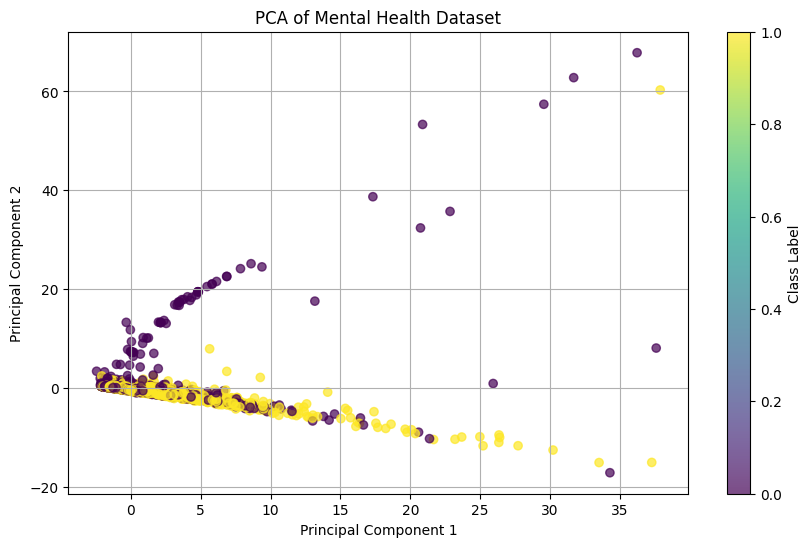

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset (without 'text' column, and with 'label' as the last column)
df_no_text = pd.read_csv('data/no_text_mhc_revision_5.csv')

# Replace missing values with 0
df_no_text.fillna(0, inplace=True)

# Convert categorical features to one-hot encoding (if any)
df_no_text_encoded = pd.get_dummies(df_no_text, drop_first=True)

# Limit to 5000 data points, ensuring class balance
df_balanced = df_no_text_encoded.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 2500), random_state=42))
df_balanced = df_balanced.sample(n=min(5000, len(df_balanced)), random_state=42)

# Separate features (X) and target (y)
X = df_balanced.drop(columns=['label'])  # Features
y = df_balanced['label']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y.reset_index(drop=True)

# Plot the PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['label'], cmap='viridis', alpha=0.7)
plt.title('PCA of Mental Health Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Class Label')
plt.grid()
plt.show()